# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** David Fekke

**Dataset:** Exam_Score_Predictions.csv

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

The dataset uses the Exam Score ('exam_score') as the target.

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

For students to achieve a higher score, we can look at which inputs or features can be used to improve their overall score.

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

My intuition and just taking a quick look at the data, class attendance will be the best feature.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [2]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/Exam_Score_Prediction.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 20,000 rows, 13 columns

Column names:
['student_id', 'age', 'gender', 'course', 'study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty', 'exam_score']


In [3]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head(10)

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7
5,6,23,male,b.tech,3.48,65.4,yes,4.2,good,mixed,low,moderate,58.2
6,7,17,female,b.tech,1.35,69.0,yes,7.4,average,online videos,high,hard,53.7
7,8,22,male,b.sc,5.48,51.1,yes,8.2,poor,self-study,low,moderate,47.3
8,9,18,other,bca,2.89,92.0,yes,6.6,poor,self-study,low,easy,44.9
9,10,17,male,bba,6.77,44.8,yes,9.8,average,group study,high,moderate,77.7


In [6]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
19995,19997,18,other,bba,6.50,71.3,yes,5.0,good,self-study,low,easy,86.5
19996,19998,18,male,b.com,3.71,41.6,no,5.9,average,coaching,medium,moderate,60.9
19997,19999,19,other,diploma,7.88,68.2,yes,4.6,poor,group study,low,easy,64.5
19998,20000,19,male,bba,4.60,76.3,no,6.1,good,self-study,medium,moderate,79.0
19999,20001,20,male,b.sc,7.50,47.9,yes,7.5,poor,coaching,medium,moderate,71.0


### 2.2 Data Types and Info

In [7]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB


In [8]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()

,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


In [9]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:
df.describe(include='object')

,gender,course,internet_access,sleep_quality,study_method,facility_rating,exam_difficulty
count,20000,20000,20000,20000,20000,20000,20000
unique,3,7,2,3,5,3,3
top,other,bca,yes,average,self-study,medium,moderate
freq,6726,2902,16988,6694,4079,6760,9878


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

This data came from a dataset on [Kaggle, (https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset)](https://www.kaggle.com/datasets/kundanbedmutha/exam-score-prediction-dataset). Each row of the data represents the features of an individual student that we should be able to use to predict how well they will achieve in their class. Excluding the student id and the target, we have eleven features per row. The features contain both numerical and categorical data.

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [10]:
# Define your target variable
TARGET = 'exam_score'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: exam_score

Basic Statistics:
count    20000.000000
mean        62.513225
std         18.908491
min         19.599000
25%         48.800000
50%         62.600000
75%         76.300000
max        100.000000
Name: exam_score, dtype: float64


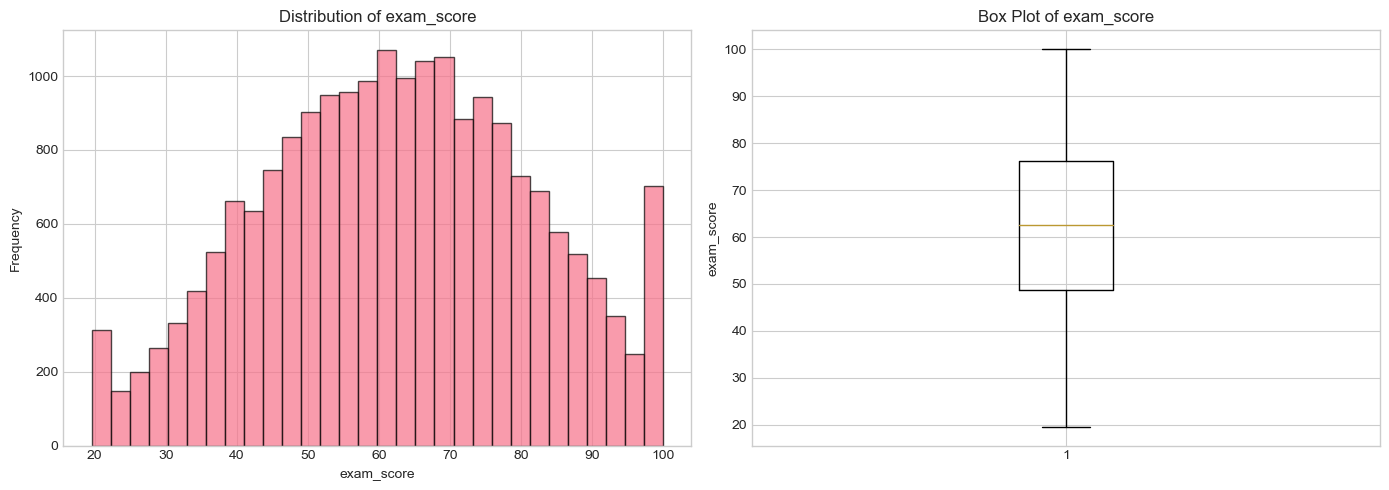


Skewness: -0.05
→ Target is approximately symmetric.


In [11]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [12]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates:,} ({(duplicates / len(df)) * 100:.2f}%)")

Duplicate rows: 0 (0.00%)


In [13]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing %': missing_percentage})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing %', ascending=False)
print(missing_df)


Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


In [14]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

✓ No missing values in the dataset!


### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

Most of the scores are towards the center of possible scores with the exception of the very top grades. The distribution follows the shape of a bell curve. This dataset did not have any missing data. There were no duplicate rows. The only surprise was the small distribution at the very top of possible scores and the distribution at the very bottom.

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [15]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols

# YOUR CODE HERE:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.pop(-1)
numerical_cols
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")


Numerical columns (5): ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours']


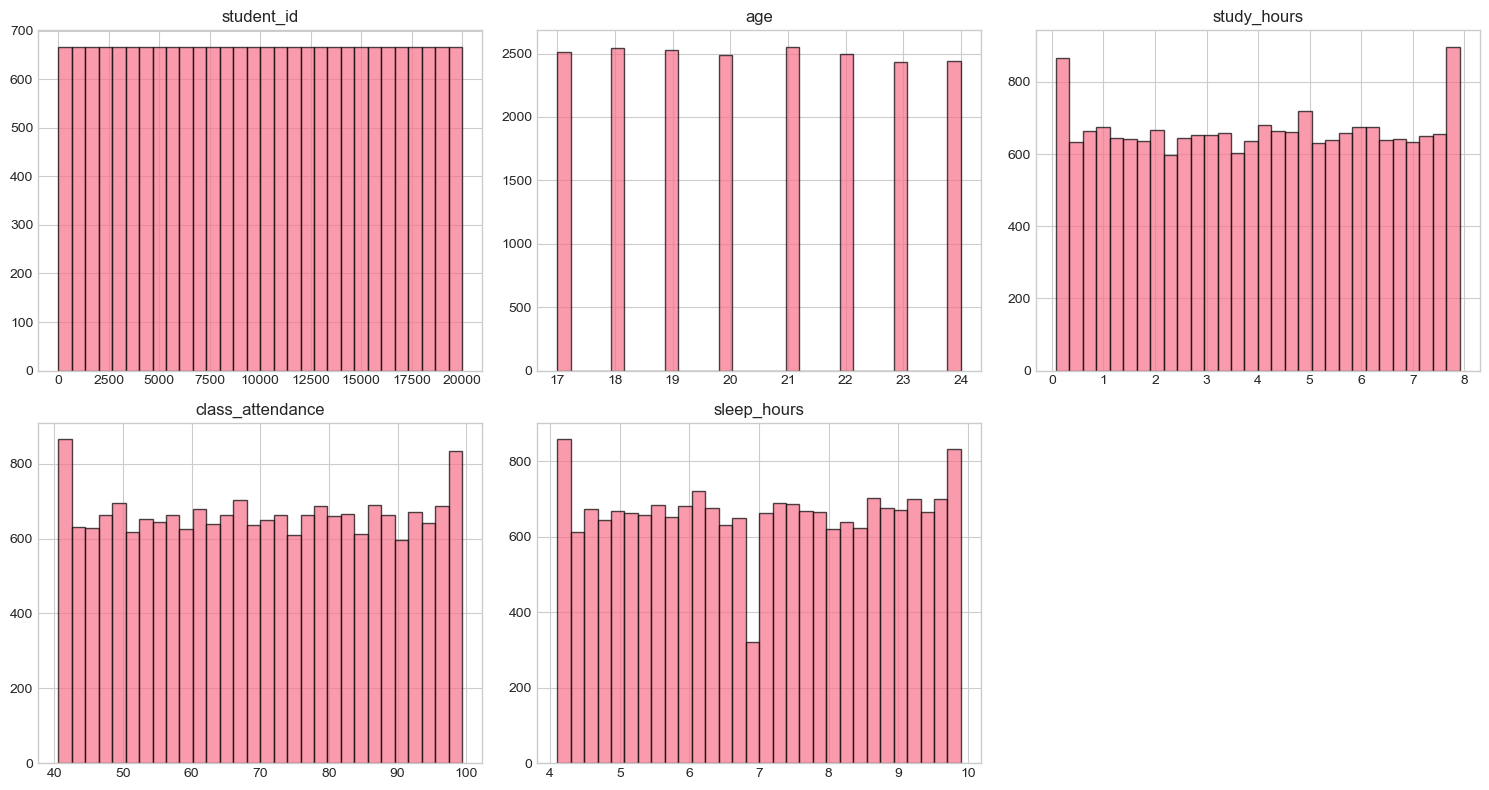

In [16]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [17]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}, {categorical_cols}")

for col in categorical_cols:
    print(f"Number of unique values for {col}: {df[col].nunique()}")
    print(f"{df[col].value_counts().head(10)}")
    print("")

Categorical columns: 7, ['gender', 'course', 'internet_access', 'sleep_quality', 'study_method', 'facility_rating', 'exam_difficulty']
Number of unique values for gender: 3
gender
other     6726
male      6695
female    6579
Name: count, dtype: int64

Number of unique values for course: 7
course
bca        2902
ba         2896
b.sc       2878
b.com      2864
bba        2836
diploma    2826
b.tech     2798
Name: count, dtype: int64

Number of unique values for internet_access: 2
internet_access
yes    16988
no      3012
Name: count, dtype: int64

Number of unique values for sleep_quality: 3
sleep_quality
average    6694
poor       6687
good       6619
Name: count, dtype: int64

Number of unique values for study_method: 5
study_method
self-study       4079
online videos    4069
coaching         4036
group study      3922
mixed            3894
Name: count, dtype: int64

Number of unique values for facility_rating: 3
facility_rating
medium    6760
low       6638
high      6602
Name: count,

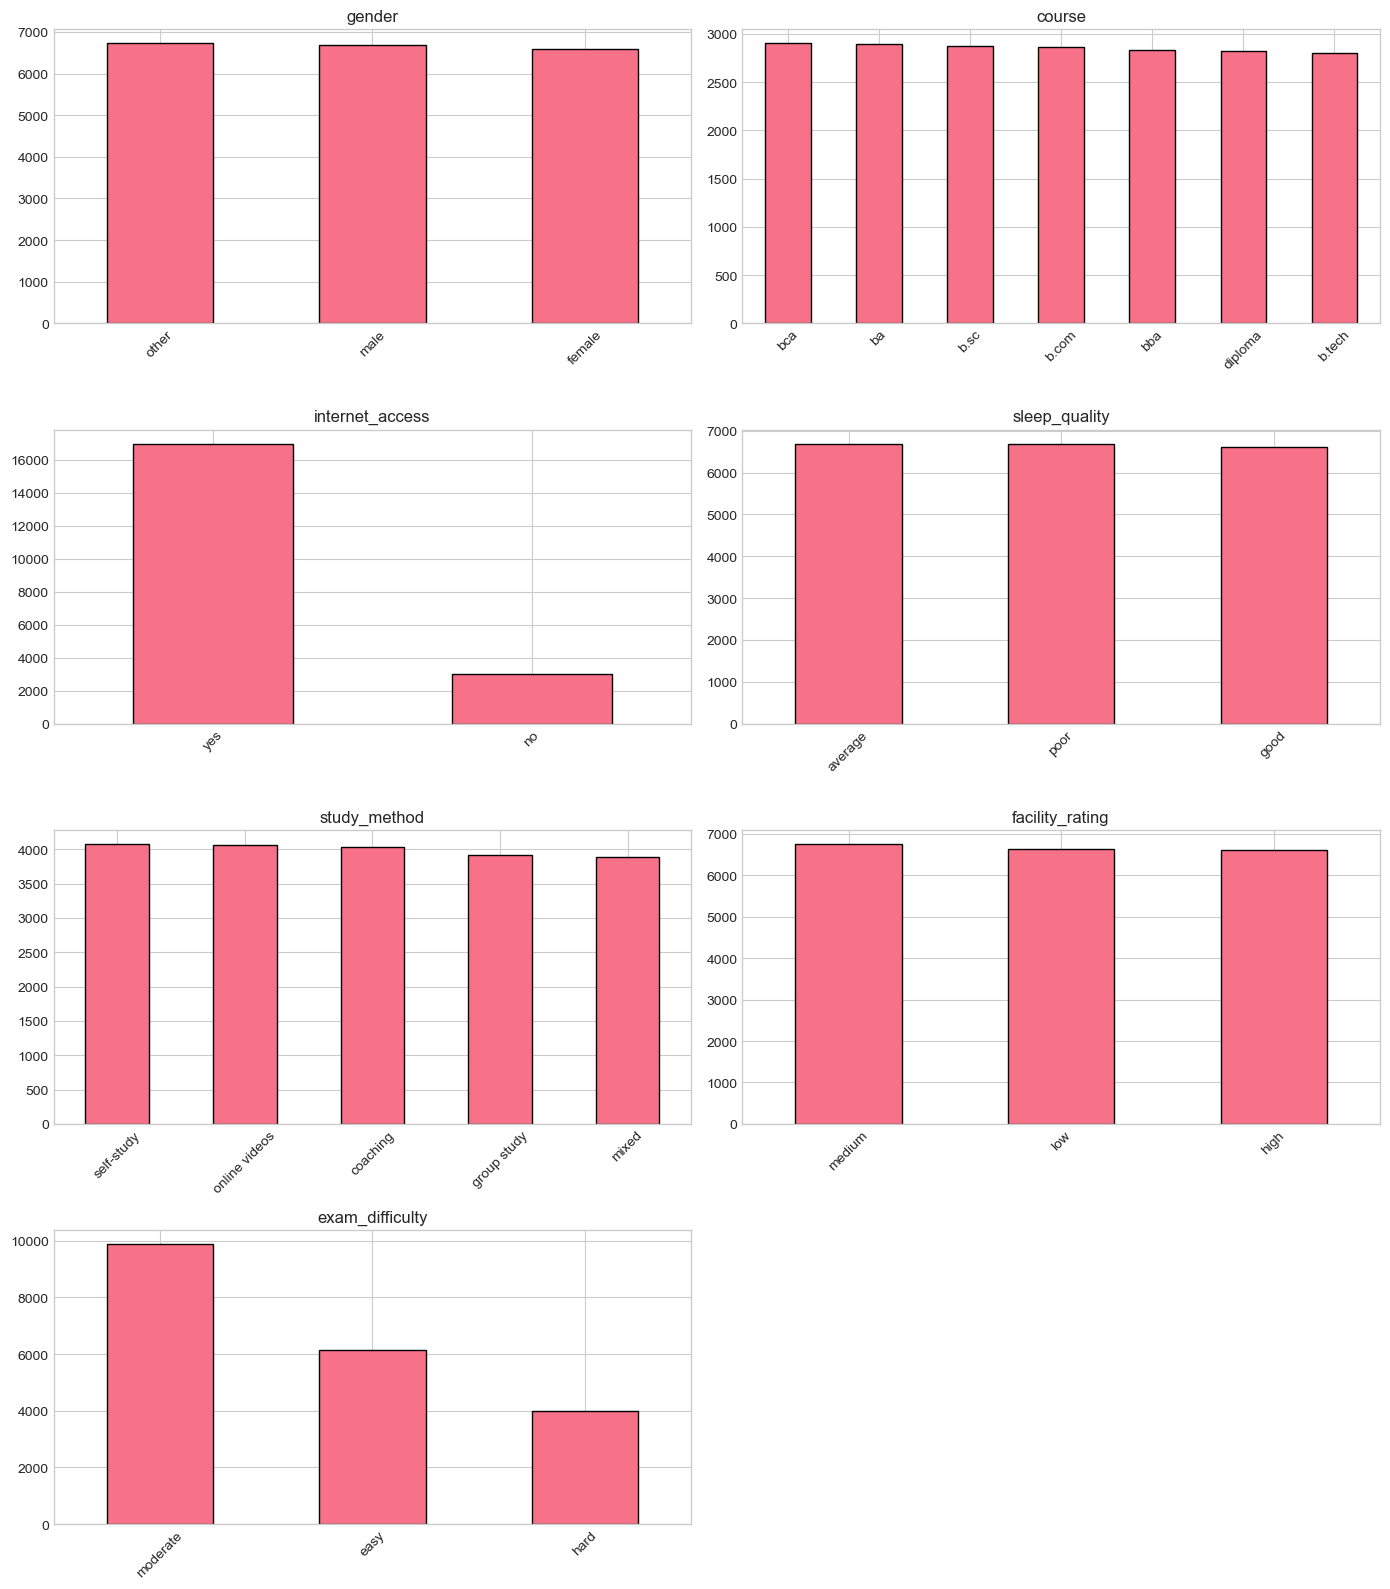

In [18]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

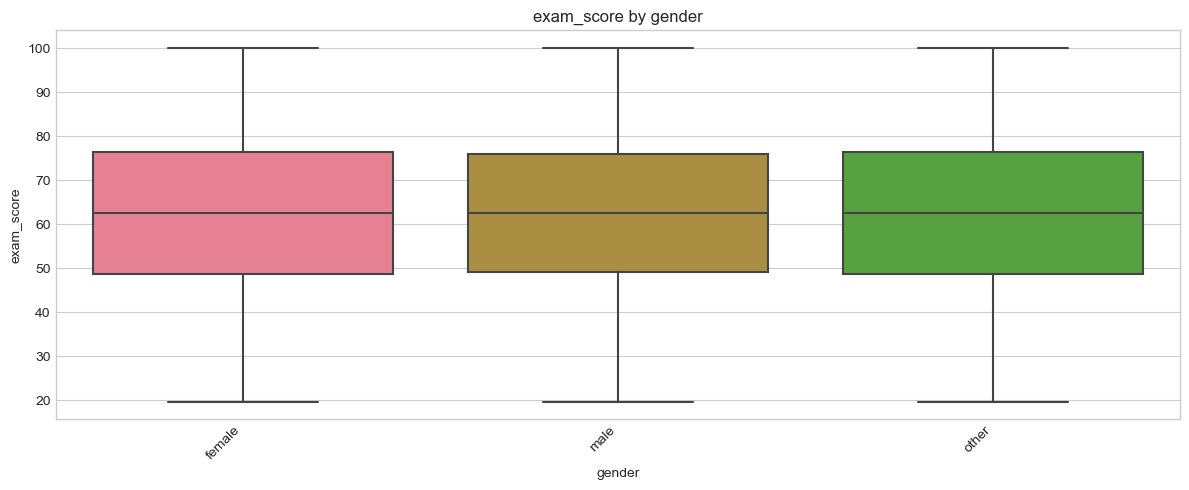


Mean exam_score by gender:
             mean  median  count
gender                          
female  62.582145    62.6   6579
other   62.561023    62.6   6726
male    62.397480    62.6   6695



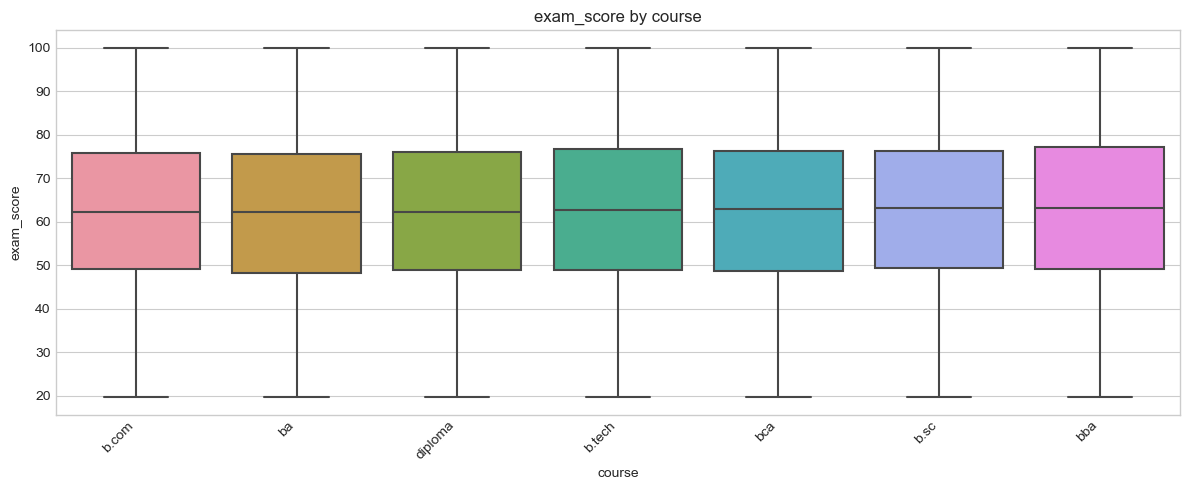


Mean exam_score by course:
              mean  median  count
course                           
bba      62.928127   63.10   2836
b.sc     62.718993   63.10   2878
b.tech   62.653529   62.60   2798
bca      62.524078   62.80   2902
b.com    62.333197   62.15   2864
diploma  62.330633   62.30   2826
ba       62.112214   62.30   2896



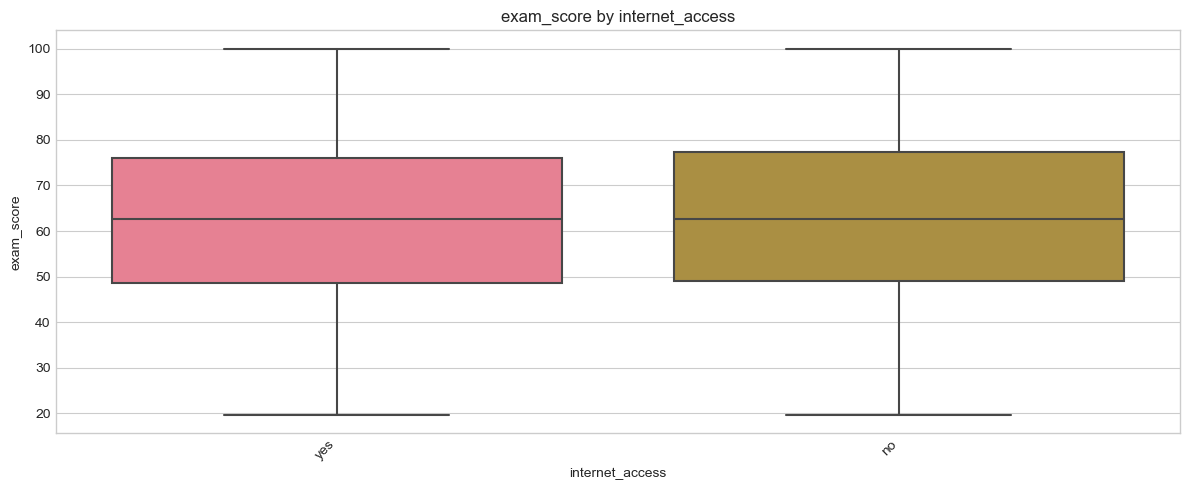


Mean exam_score by internet_access:
                      mean  median  count
internet_access                          
no               62.864663   62.65   3012
yes              62.450914   62.60  16988



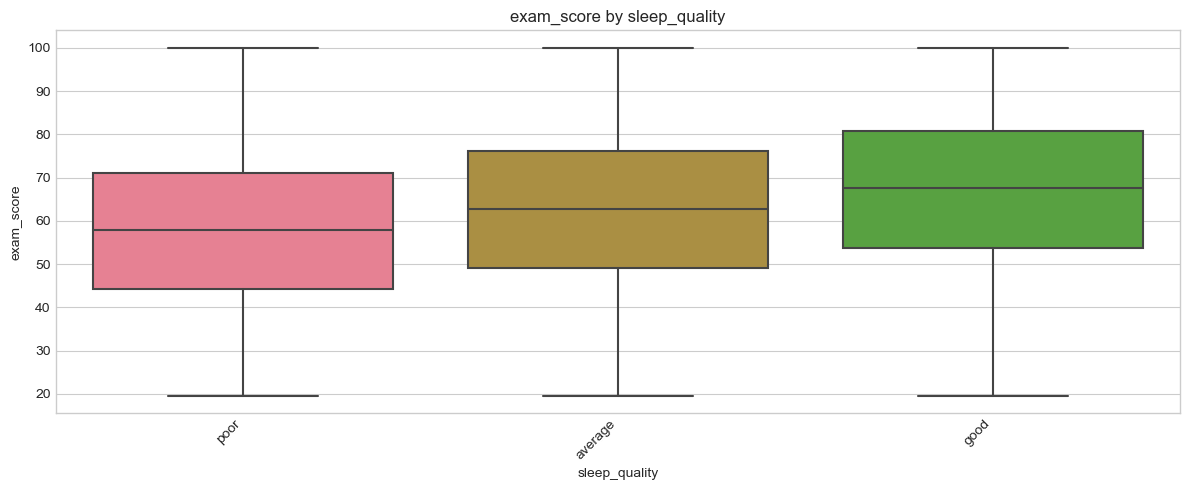


Mean exam_score by sleep_quality:
                    mean  median  count
sleep_quality                          
good           67.138598   67.60   6619
average        62.530512   62.65   6694
poor           57.917582   58.00   6687



In [19]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

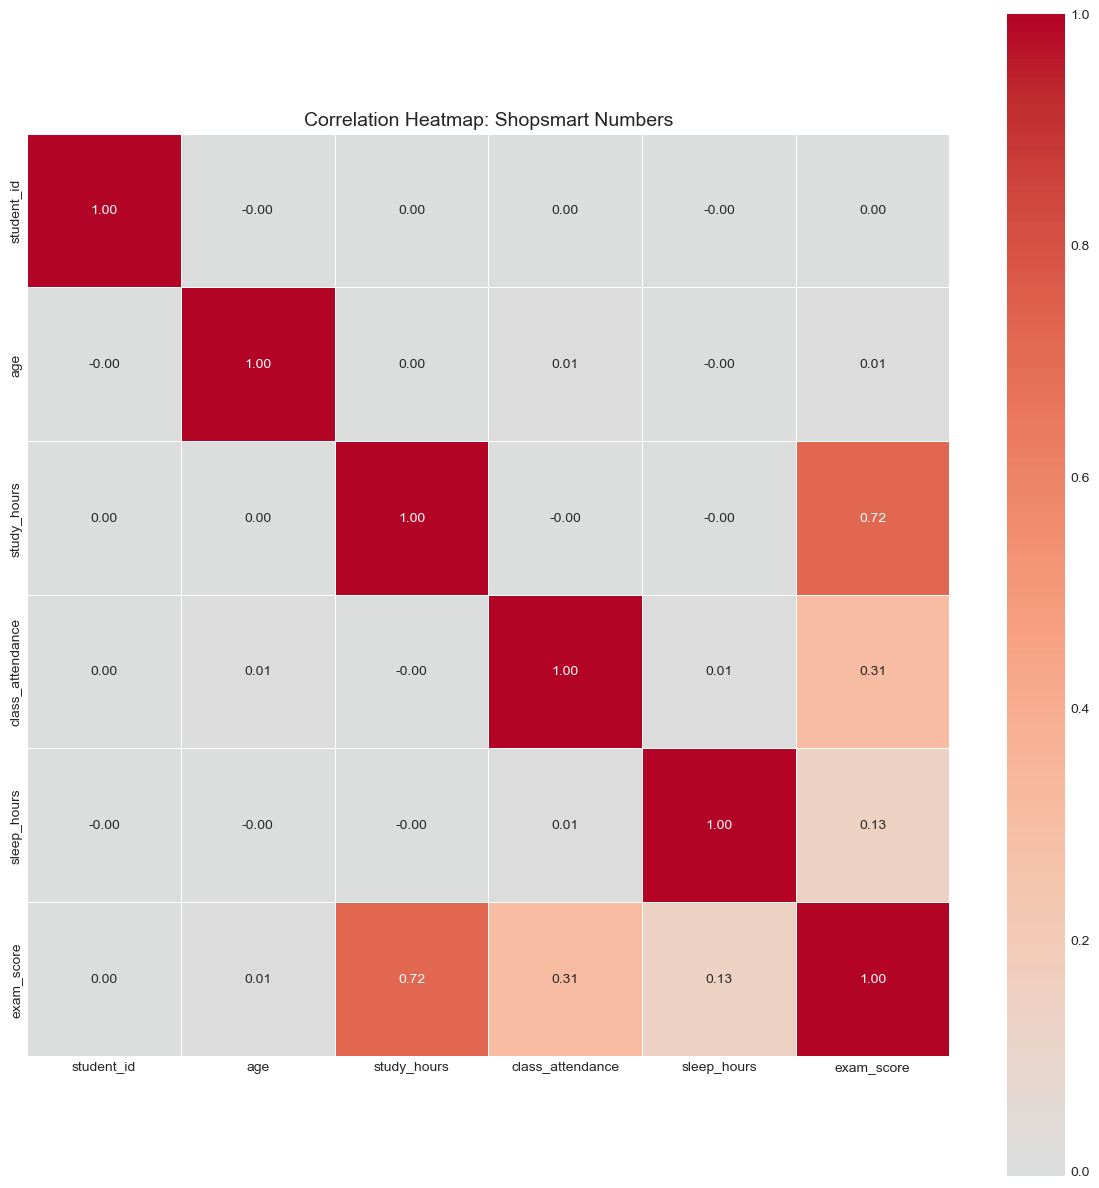

In [20]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:
columns = numerical_cols + [TARGET]
correlation_matrix = df[columns].corr()

plt.figure(figsize=(12, 12))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            cmap='coolwarm',      # Red = positive, Blue = negative
            center=0,             # Center the colormap at 0
            fmt='.2f',            # 2 decimal places
            square=True,          # Make cells square
            linewidths=0.5)       # Add grid lines

plt.title('Correlation Heatmap: Shopsmart Numbers', fontsize=14)
plt.tight_layout()
plt.show()


In [21]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:
column_to_remove = 'exam_score'

if column_to_remove in correlation_matrix.columns:
    correlation_matrix = correlation_matrix.drop(columns=[column_to_remove], index=[column_to_remove])
    print(f"Successfully dropped {column_to_remove}")
else:
    print(f"Column {column_to_remove} not found in matrix.")
# correlation_matrix.drop(columns=['exam_score'], index=['exam_score'], inplace=True)

for col in correlation_matrix:
    print(col)
    # Get correlations with target from the original dataframe
    target_correlations = df[numerical_cols].corrwith(df[TARGET]).sort_values(ascending=False)

    print("\nCorrelations with target variable:")
    print(target_correlations)

    # Identify features with strong correlation (> 0.5)
    strong_corr_features = target_correlations[abs(target_correlations) > 0.5].index.tolist()
    print(f"\nFeatures with strong correlation > 0.5: {strong_corr_features}")

Successfully dropped exam_score
student_id

Correlations with target variable:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id          0.003269
dtype: float64

Features with strong correlation > 0.5: ['study_hours']
age

Correlations with target variable:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id          0.003269
dtype: float64

Features with strong correlation > 0.5: ['study_hours']
study_hours

Correlations with target variable:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id          0.003269
dtype: float64

Features with strong correlation > 0.5: ['study_hours']
class_attendance

Correlations with target variable:
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id   

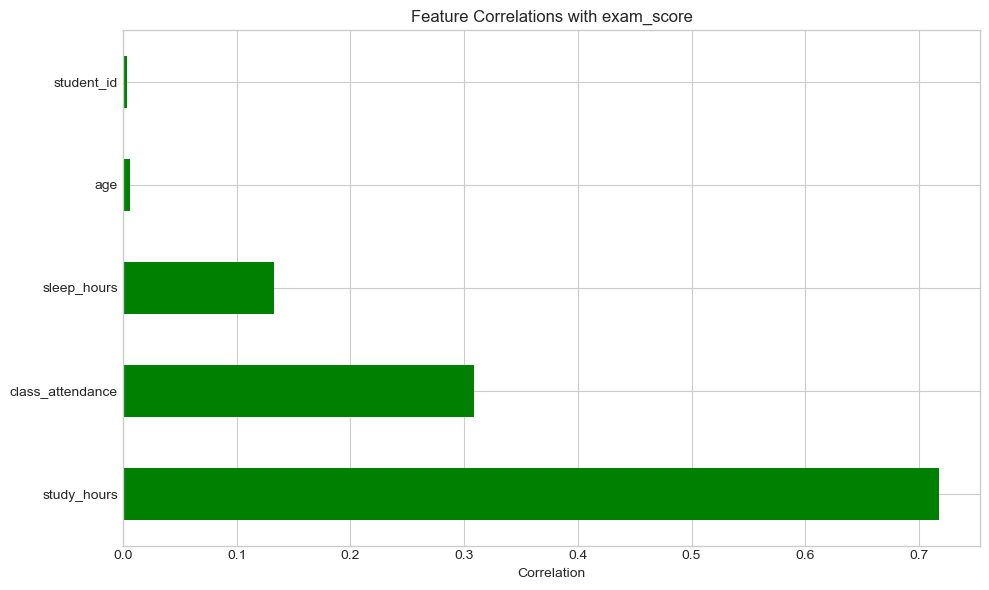

In [22]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

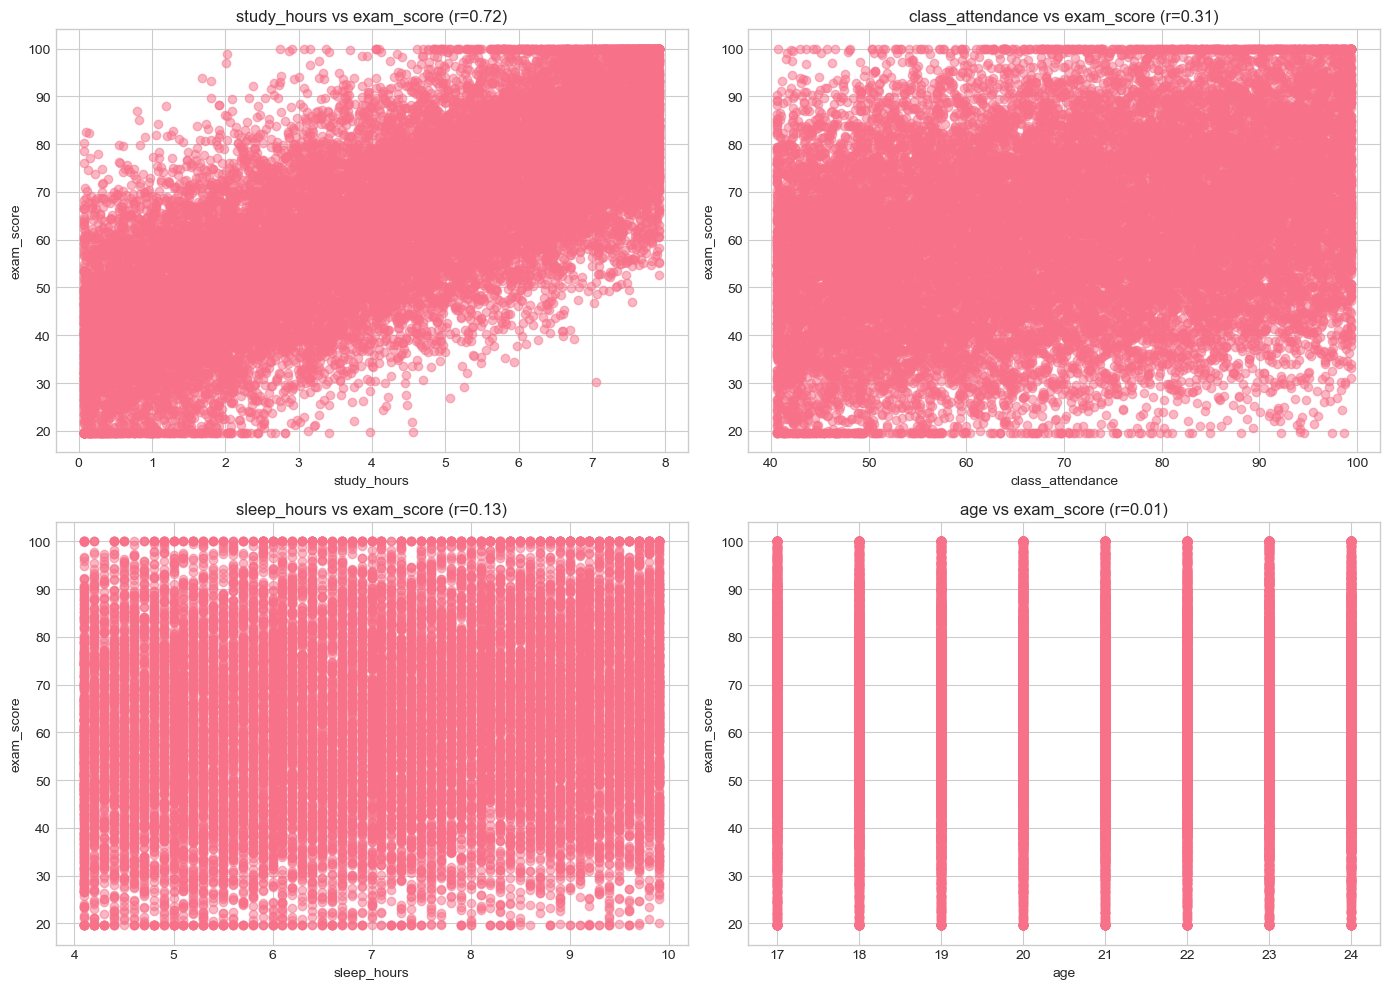

In [23]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

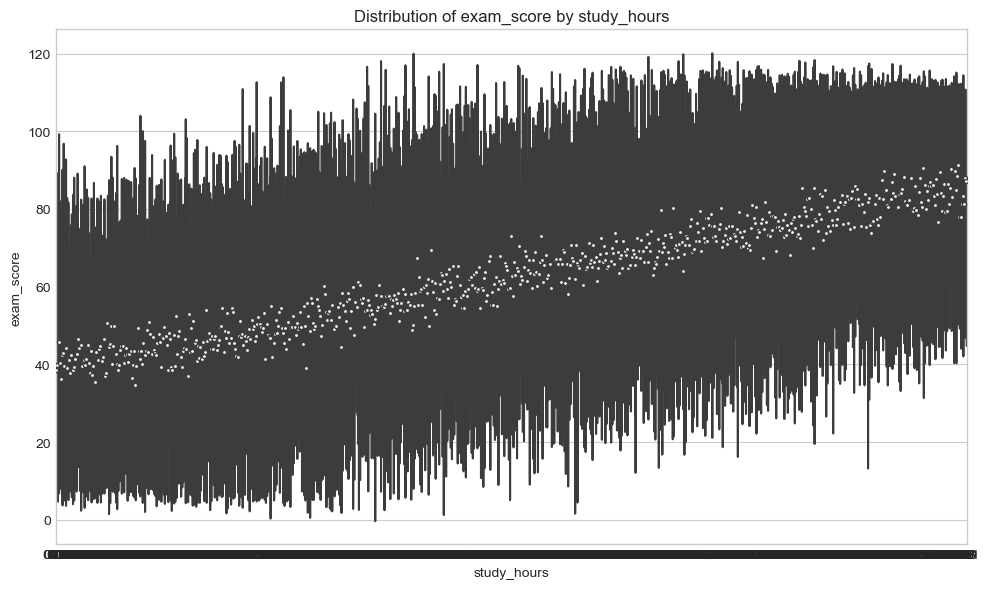

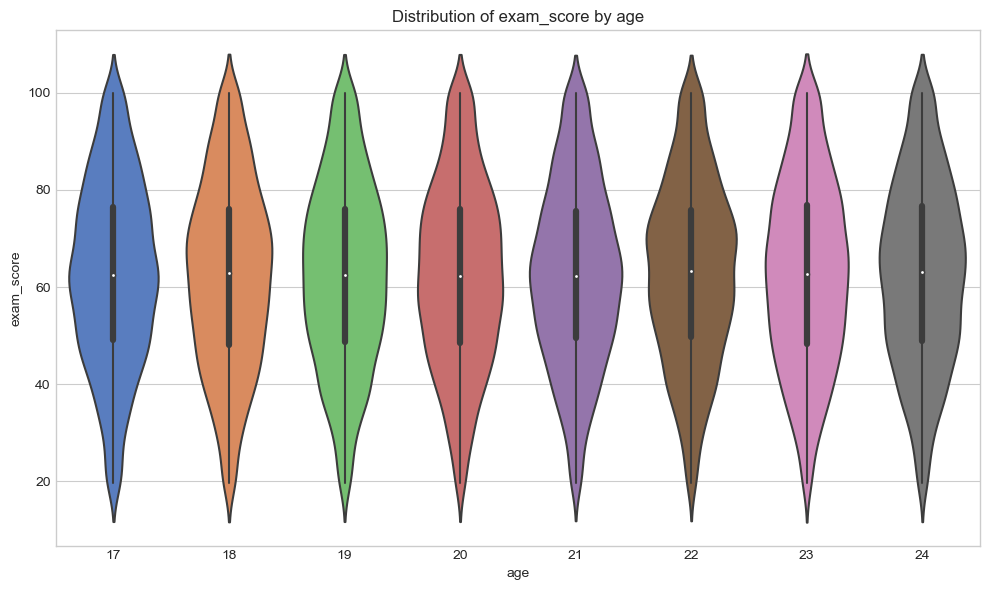

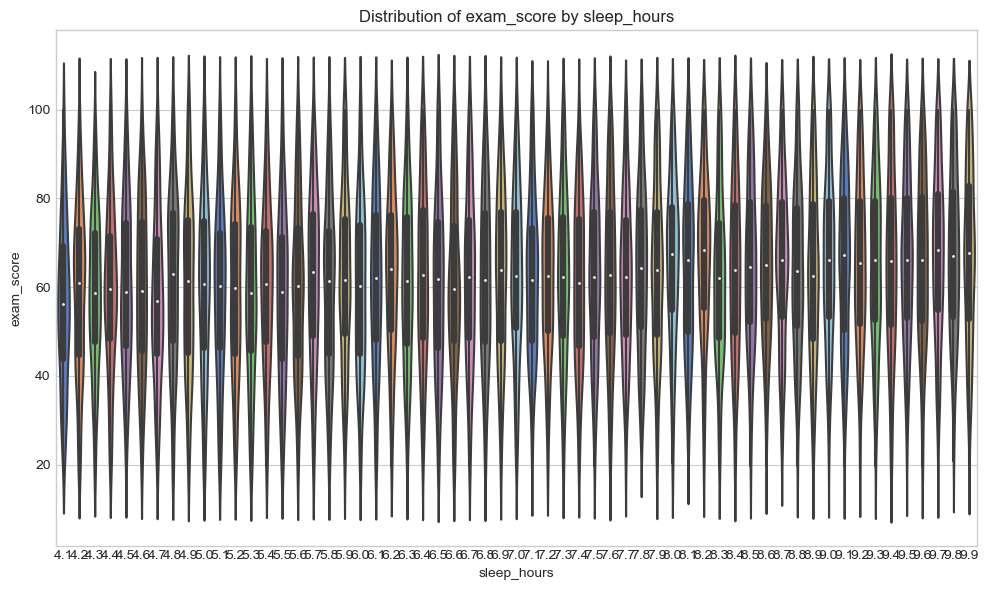

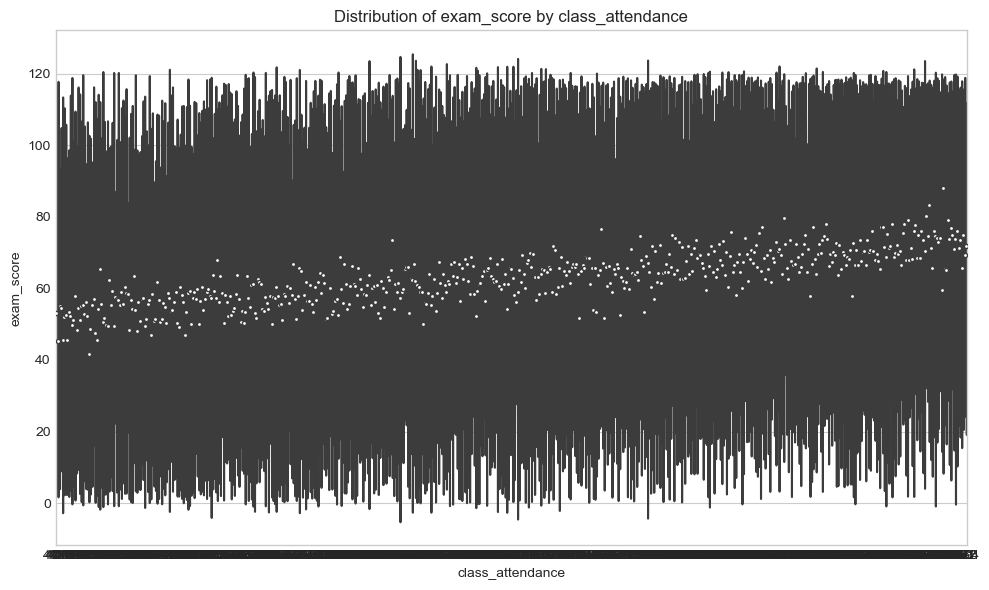

In [24]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!

features = ['study_hours', 'age', 'sleep_hours', 'class_attendance']

# Assuming 'Category' is your feature and 'Target' is what you're predicting

if len(features) > 0:
    for i, feature in enumerate(features[:n_features]):
        plt.figure(figsize=(10, 6))
        sns.violinplot(data=df, x=feature, y='exam_score', palette="muted")
        plt.title(f'Distribution of {TARGET} by {feature}')
        plt.tight_layout()
        plt.show()

else:
    print("No numerical features to plot.")

<Figure size 1000x600 with 0 Axes>

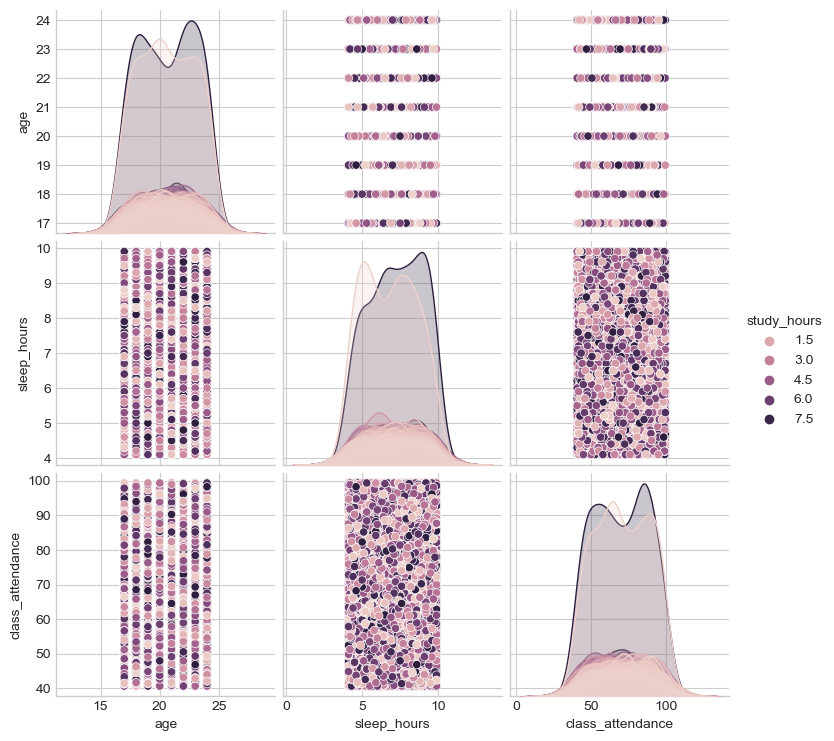

In [25]:
# More exploration...

# It's best to select only 4-5 key features, or this will be very slow/crowded
key_features = features #.append('exam_score')

plt.figure(figsize=(10, 6))
sns.pairplot(df[key_features], diag_kind='kde', hue='study_hours')
plt.show()


**What additional insights did you discover?**

Most of the numerical features seem to have a linear relation with the target, but most had a high variance. The age of the student made no difference in the exam_score. 

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**

The feature that had the highest correlation is the amount of time the student put into studying for the exam. The categorical features that had the highest impact was whether or not the student had internet access. The next category that only had a moderate effect on the overall score was the quality of the facility. The features that I found unimportant were most of the categories such as study method and the course of study. The biggest pattern I saw was the amount of variance in the some of the numerical features. The only outliers I had concerns were in the distribution of the exam_score. There were a greater concentration of exam_scores at 100 than in the high 90s. 

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [26]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:
df_clean = df.copy()


print(f"Starting shape: {df_clean.shape}")

Starting shape: (20000, 13)


In [27]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

Columns to consider dropping:

1. >50% missing values: []

2. Potential ID/URL columns: ['student_id']

3. High cardinality (>100 unique): []

4. Low variance (>95% same value): []


In [28]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    'gender',
    'age',
    'student_id'
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

Dropped 3 columns: ['gender', 'age', 'student_id']
New shape: (20000, 10)


**Explain which columns you dropped and why:**

[Describe your reasoning]

### 5.2 Handle Duplicate Rows

In [29]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
print("There are no duplicate rows to remove.")

There are no duplicate rows to remove.


### 5.3 Handle Missing Values

In [30]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Series([], dtype: int64)


In [31]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:
print("There were no missing values to handle.")


There were no missing values to handle.


In [32]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

I was lucky in that the dataset I picked did not have any missing values. If I did have any I would have used the mean for a range of values or a default if it would have been appropriate.

### 5.4 Handle Outliers (if needed)

In [33]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    # print(f"{Q1} {Q3} for {column}, outliers: {n_outliers}")
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:


In [34]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:
print("There were no outliers to handle.")


There were no outliers to handle.


**Explain your outlier handling strategy (or why you kept them):**

I did not have any outliers in the dataset I selected. If I had, I would have removed those rows.

### 5.5 Data Type Corrections

In [35]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
course               object
study_hours         float64
class_attendance    float64
internet_access      object
sleep_hours         float64
sleep_quality        object
study_method         object
facility_rating      object
exam_difficulty      object
exam_score          float64
dtype: object


In [36]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:
print("There were no data type issues to fix.")


There were no data type issues to fix.


## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [37]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:
print("There were no new features to create.")


There were no new features to create.


**Explain your new features:**

I did not add any new numerical features.

### 6.2 Encode Categorical Variables

In [38]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:
def label_encode_ordinal(df, column, order):
    df_encoded = df.copy()

    # Hint: Create a mapping dictionary like {'Bronze': 0, 'Silver': 1, ...}
    mapping = {}
    for index, item in enumerate(order):
        mapping[item] = index

    # Then use df_encoded[column].map(mapping)
    df_encoded[column] = df_encoded[column].map(mapping)

    return df_encoded


df_clean.info()

df_clean = label_encode_ordinal(df_clean, 'sleep_quality', ['poor', 'average', 'good'])
df_clean = label_encode_ordinal(df_clean, 'facility_rating', ['low', 'medium', 'high'])
df_clean = label_encode_ordinal(df_clean, 'exam_difficulty', ['hard', 'moderate', 'easy'])
df_clean = label_encode_ordinal(df_clean, 'internet_access', ['no', 'yes'])

# sleep_quality = df['sleep_quality'].unique()

# print(sleep_quality)
# ['poor' 'average' 'good'] map to 0,1,2
# facility_rating = df['facility_rating'].unique()
# print(facility_rating)
# ['low' 'medium' 'high'] map to 0,1,2

# exam_difficulty = df['exam_difficulty'].unique()
# print(exam_difficulty)
# ['hard' 'moderate' 'easy'] map to 0,1,2

cat_cols = ['study_method'] # df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
# sleep_quality        object
# study_method         object
# facility_rating      object
# exam_difficulty      object
# cat_cols.remove('')
print(f"Categorical columns to consider for encoding: {cat_cols}")
for col in cat_cols:
    n_unique = df_clean[col].nunique()
    recommendation = "one-hot encoding" if n_unique <= 10 else "consider label encoding or dropping"
    print(f"{col}: {n_unique} unique values → {recommendation}")

df_clean = pd.get_dummies(df_clean, columns=cat_cols)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course            20000 non-null  object 
 1   study_hours       20000 non-null  float64
 2   class_attendance  20000 non-null  float64
 3   internet_access   20000 non-null  object 
 4   sleep_hours       20000 non-null  float64
 5   sleep_quality     20000 non-null  object 
 6   study_method      20000 non-null  object 
 7   facility_rating   20000 non-null  object 
 8   exam_difficulty   20000 non-null  object 
 9   exam_score        20000 non-null  float64
dtypes: float64(4), object(6)
memory usage: 1.5+ MB
Categorical columns to consider for encoding: ['study_method']
study_method: 5 unique values → one-hot encoding


In [39]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:

df_clean.head()

,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,facility_rating,exam_difficulty,exam_score,study_method_coaching,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study
0,diploma,2.78,92.9,1,7.4,0,0,0,58.9,True,False,False,False,False
1,bca,3.37,64.8,1,4.6,1,1,1,54.8,False,False,False,True,False
2,b.sc,7.88,76.8,1,8.5,0,2,1,90.3,True,False,False,False,False
3,diploma,0.67,48.4,1,5.8,1,0,1,29.7,False,False,False,True,False
4,diploma,0.89,71.6,1,9.8,0,0,1,43.7,True,False,False,False,False


**Explain your encoding strategy:**

I chose not to encode any columns since they are either numeric or boolean at this phase.

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [40]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!



**Explain your additional feature engineering:**

I did not add any additional features at this stage.

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [41]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:
numerical_features = df_clean.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove(TARGET)
print(f"Numerical features to consider for scaling: {numerical_features}")
for col in numerical_features:
    col_min = df_clean[col].min()
    col_max = df_clean[col].max()
    col_range = col_max - col_min
    print(f"{col}: min={col_min}, max={col_max}, range={col_range}")
# Scale numerical features



Numerical features to consider for scaling: ['study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty']
study_hours: min=0.08, max=7.91, range=7.83
class_attendance: min=40.6, max=99.4, range=58.800000000000004
internet_access: min=0, max=1, range=1
sleep_hours: min=4.1, max=9.9, range=5.800000000000001
sleep_quality: min=0, max=2, range=2
facility_rating: min=0, max=2, range=2
exam_difficulty: min=0, max=2, range=2


### 6.5 Final Sanity Checks

In [42]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 20,000 rows, 14 columns
   (Started with 20,000 rows, 13 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'exam_score':
   - Min: 19.60
   - Max: 100.00
   - Mean: 62.51

5. Data types:
   - Numerical: 8
   - Categorical: 1

⚠️ Still have categorical columns: ['course']
   Make sure these are encoded before modeling!


### 6.6 Save Processed Data

In [46]:
df_clean = df_clean.drop(columns=['course'])
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (20000, 13)

Columns (13):
['study_hours', 'class_attendance', 'internet_access', 'sleep_hours', 'sleep_quality', 'facility_rating', 'exam_difficulty', 'exam_score', 'study_method_coaching', 'study_method_group study', 'study_method_mixed', 'study_method_online videos', 'study_method_self-study']

Data types:
study_hours                   float64
class_attendance              float64
internet_access                 int64
sleep_hours                   float64
sleep_quality                   int64
facility_rating                 int64
exam_difficulty                 int64
exam_score                    float64
study_method_coaching            bool
study_method_group study         bool
study_method_mixed               bool
study_method_online videos       bool
study_method_self-study          bool
dtype: object


In [47]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

[Write a thorough summary of everything you did to clean and transform the data]

**Final feature list for modeling:**

[List all the features you'll use in your models]

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---